In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('Watermark')] + "Watermark/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.usenix_main import usenix_blackbox
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images
from src.util import plot_blackbox

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we are running a surrogate model attack. The attacker and owner data is disjoint.

[1/4] USENIX Blackbox Attack: Loading MNIST data
      Owner data: 30000 Attacker Data: 30000
     Found cached training data for owner_data3000030000
     Found cached training data for attacker_data3000030000
[2/4] Training the network with 35 keys each repeated 100 times)
Instructions for updating:
Use tf.cast instead.
Train on 33500 samples, validate on 10000 samples
Epoch 1/20
33500/33500 [==============================] - 22s 661us/step - loss: 0.2392 - acc: 0.9269 - val_loss: 0.0748 - val_acc: 0.9775
=> Time: : 22.136003494262695
Confusion matrix, without normalization


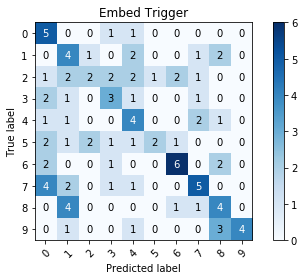

=> watermark_val: 1.0
Epoch 2/20
33500/33500 [==============================] - 17s 515us/step - loss: 0.0542 - acc: 0.9838 - val_loss: 0.0465 - val_acc: 0.9852
=> Time: : 17.246628046035767
Confusion matrix, without normalization


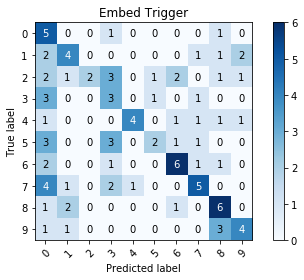

=> watermark_val: 1.0
Epoch 3/20
33500/33500 [==============================] - 17s 515us/step - loss: 0.0370 - acc: 0.9886 - val_loss: 0.0505 - val_acc: 0.9857
=> Time: : 17.250678062438965
Confusion matrix, without normalization


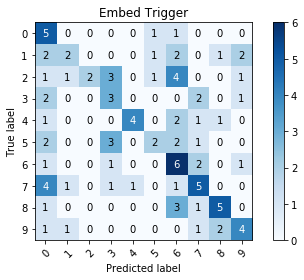

=> watermark_val: 1.0
Epoch 4/20
33500/33500 [==============================] - 17s 508us/step - loss: 0.0249 - acc: 0.9920 - val_loss: 0.0350 - val_acc: 0.9902
=> Time: : 17.012781858444214
Confusion matrix, without normalization


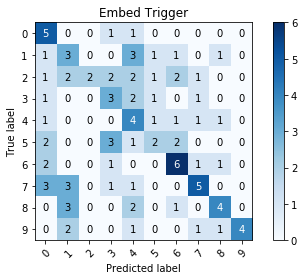

=> watermark_val: 1.0
Epoch 5/20
20800/33500 [=================>............] - ETA: 5s - loss: 0.0186 - acc: 0.9940

In [ ]:
surr_model, all_history = usenix_blackbox(
     load_dataset_func=load_mnist_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="MNIST",  # Label of the dataset (for caching)
     model=get_lenet_model_for_mnist(),  # Model specification for wm_embedding
     surrogate_model=get_lenet_model_for_mnist(),
     owner_data_size=30000,
     total_owner_data_size=30000,
     key_length=35,
     wm_boost_factor=100,
     attacker_data_size=30000,
     total_attacker_data_size=30000,
     epochs_embed=20,
     epochs_surr=15,
     batchsize_surr=64,
     cache_embed_wm="usenix_mnist_30000",
     verbose=True
)

In [ ]:
plot_blackbox(all_history)